In [10]:
%reload_ext autoreload
%autoreload 2

import numpy as np

import warnings
import torch
import pickle
import matplotlib.pyplot as plt

# from Probe import get_pdata, probe_shapelet
import utils
from utils.constants import xai_names
from utils.visualization import plot_multiple_images_with_attribution
from utils.shapelet import get_distances_info_gain
from utils.model_utils import get_gradient_from_layers
# from utils.insert_shapelet import get_gt_attr
warnings.filterwarnings("ignore")

In [11]:
device = 'cuda' if torch.cuda.is_available else 'cpu'

In [18]:
from tsai.models.FCN import FCN

model_path = 'models/simu1/'
model = FCN(c_in=1, c_out=2)
state_dict = torch.load(f'{model_path}/weight.pt',map_location='cuda:1')
model.load_state_dict(state_dict)
model.eval()

with open(f'models/simu1/data.pkl', 'rb') as f:
    data = pickle.load(f)
data.keys()
train_x, test_x, train_y, test_y = data['train_x'], data['test_x'], data['train_y'], data['test_y']
test_preds = np.load('models/simu1/test_preds.npy')
test_y = np.argmax(test_y, axis=1)
train_y = np.argmax(train_y, axis=1)

# instance_length = train_x.shape[-1]

# with open(f'shapelets/GunPoint/RSTF.pkl', 'rb') as f:
#     ST_attribution = pickle.load(f)
# # pick the first Shapelet
# info_gain, shapelet_length, start_pos, dimension, inst_index, shapelet_class, z_norm_shapelet = ST_attribution.shapelets[0]

In [13]:
model.to(device)
train_x_pred = model(torch.from_numpy(train_x).float().to(device)).detach().cpu().numpy()
train_x_pred

array([[ 2.601886 , -4.131304 ],
       [ 3.32642  , -4.845396 ],
       [ 3.585831 , -5.084428 ],
       ...,
       [-4.943556 ,  3.2419932],
       [-4.4368215,  2.7482486],
       [-4.5374556,  2.8419027]], dtype=float32)

In [14]:
zero_input = np.zeros((100,1,1000)) 
zero_input = zero_input + np.random.normal(0, 0.01, zero_input.shape)
zero_pred = model(torch.from_numpy(zero_input).float().to(device)).detach().cpu().numpy()


Saliency


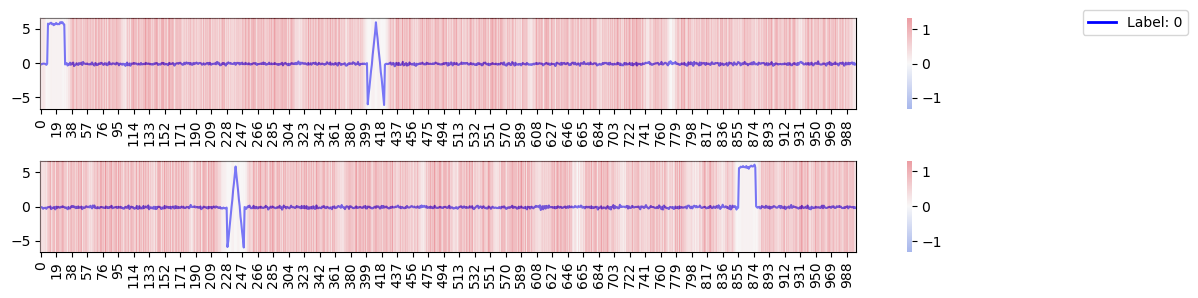

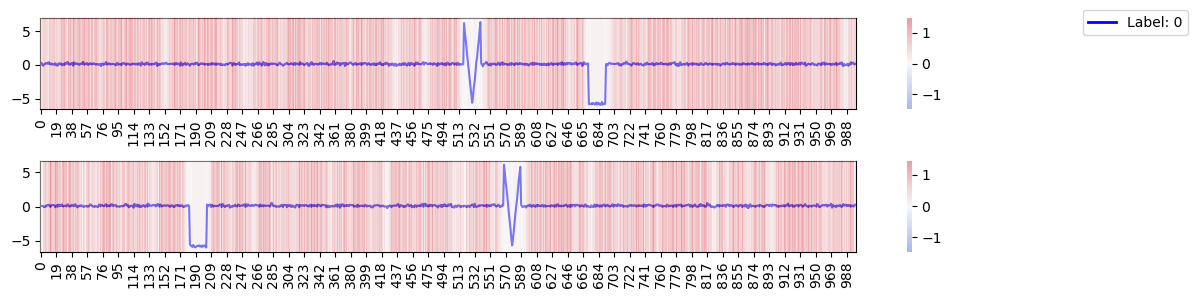

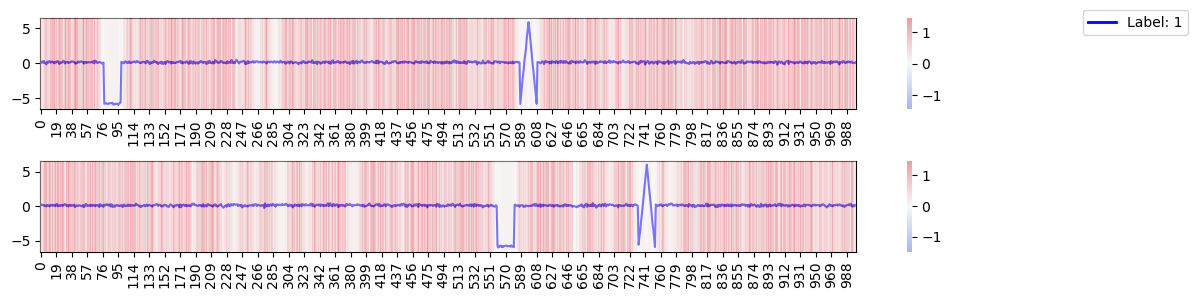

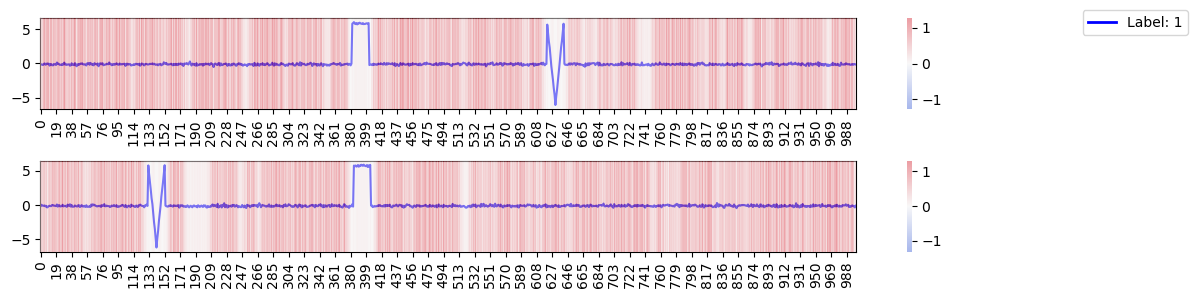

In [17]:
for xai_name in ['Saliency']:
    print(xai_name)
    # attr_gp, _= get_gt_attr(model,train_x,None,None,
    #                         save_dir=f'attributions/simu1/{xai_name}',
    #                         xai_name=xai_name,target_class=None)


    with open(f'attributions/simu1/{xai_name}/train_exp.pkl', 'rb') as f:
        attr = pickle.load(f)
    attr_gp = attr['attributions']
    plot_multiple_images_with_attribution(train_x[0:500], train_y[0:500], 2, (12, 3), 
                                          use_attribution=True,
                                          attributions=attr_gp[0:500],
                                          normalize_attribution=True,
                                          save_path=None,
                                          test_y = train_y[0:500],
                                         )
    plot_multiple_images_with_attribution(train_x[500:1000], train_y[500:1000], 2,  (12, 3), 
                                          use_attribution=True,
                                          attributions=attr_gp[500:1000],
                                          normalize_attribution=True,
                                          save_path=None,
                                          test_y = train_y[500:1000],
                                         )
    plot_multiple_images_with_attribution(train_x[1000:1500], train_y[1000:1500], 2, (12, 3), 
                                          use_attribution=True,
                                          attributions=attr_gp[1000:1500],
                                          normalize_attribution=True,
                                          save_path=None,
                                          test_y = train_y[1000:1500],
                                         )
    plot_multiple_images_with_attribution(train_x[1500:2000], train_y[1500:2000], 2, (12, 3), 
                                      use_attribution=True,
                                      attributions=attr_gp[1500:2000],
                                      normalize_attribution=True,
                                      save_path=None,
                                      test_y = train_y[1500:2000],
                                     )

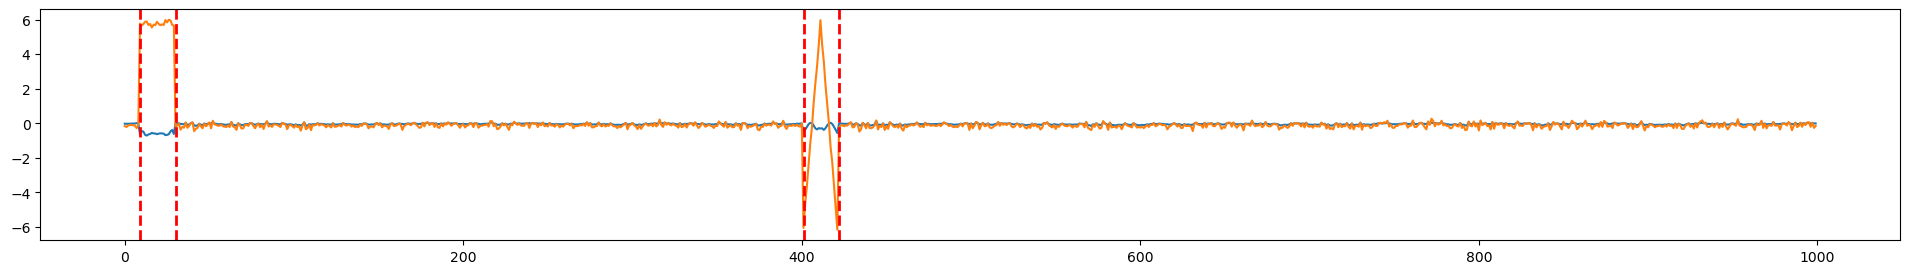

In [7]:
plt.figure(figsize=(24,3))
plt.plot(attr_gp[0])
plt.plot(train_x[0].flatten())
plt.axvline(x=9, color='r', linestyle='--', linewidth=2)
plt.axvline(x=30, color='r', linestyle='--', linewidth=2)

plt.axvline(x=401, color='r', linestyle='--', linewidth=2)
plt.axvline(x=422, color='r', linestyle='--', linewidth=2)

-6.158119213573378 5.971807744785115


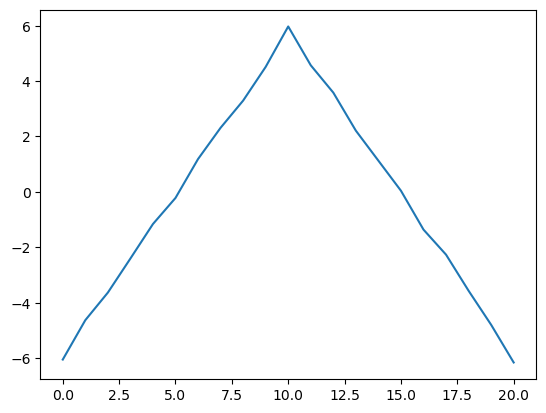

In [8]:
shapelet = train_x[0,:,401:422].flatten()
# shapelet = utils.z_norm_process_shapelet(shapelet)
plt.plot(shapelet)
instance_length = train_x.shape[-1]
start_pos=401
print(min(shapelet),max(shapelet))

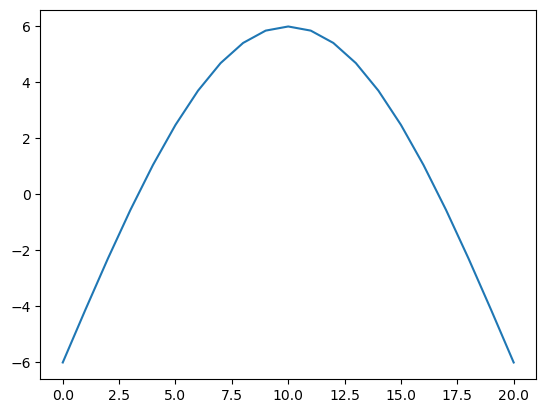

In [9]:
shapelet = np.sin(np.linspace(0,1*np.pi,21))*12-6#np.random.normal(0,0.05,21) 
plt.plot(shapelet)

In [10]:
pdata = get_pdata(shapelet=shapelet, selected_datasets=utils.selected_uni, inst_length=instance_length, 
                   num_shapelet=1, is_add=False, repeat_max=100,
                       is_z_norm=True, save_dir='probe/simu_implet_random_scaled')

dealing with ECG200: (100, 1, 96)
dealing with Beef: (30, 1, 470)
dealing with ElectricDevices: (8926, 1, 96)
dealing with Earthquakes: (322, 1, 512)
dealing with Wafer: (1000, 1, 152)
dealing with PowerCons: (180, 1, 144)
dealing with NonInvasiveFetalECGThorax1: (1800, 1, 750)
dealing with ECG5000: (500, 1, 140)
dealing with HandOutlines: (1000, 1, 2709)
dealing with CBF: (30, 1, 128)
dealing with FordA: (3601, 1, 500)
dealing with TwoPatterns: (1000, 1, 128)
dealing with UWaveGestureLibraryAll: (896, 1, 945)
dealing with Chinatown: (20, 1, 24)
dealing with Yoga: (300, 1, 426)
dealing with DistalPhalanxOutlineCorrect: (600, 1, 80)
dealing with Computers: (250, 1, 720)
dealing with ShapesAll: (600, 1, 512)
dealing with Strawberry: (613, 1, 235)


In [44]:
with open('probe/simu_implet_random_scaled/pdata.pkl','rb') as f:
    pdata = pickle.load(f)

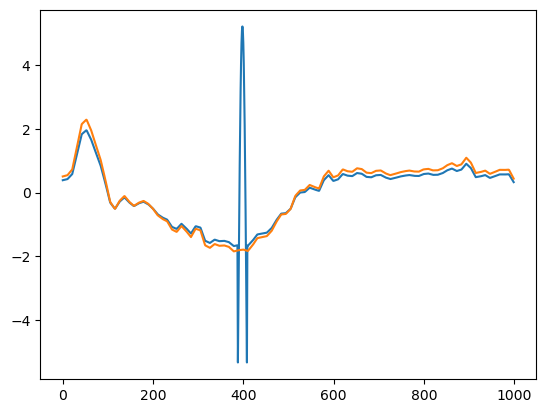

In [12]:
plt.plot(pdata['pdata_ws'][0].flatten(),label='with shapelet')
plt.plot(pdata['pdata_wos'][0].flatten(),label='without shapelet')

In [45]:
pdata = np.concatenate((pdata['pdata_ws'],pdata['pdata_wos']), axis=0)

In [46]:
start_pos=0
shapelet = np.sin(np.linspace(0,1*np.pi,21))*12-6#np.random.normal(0,0.05,21) 

In [47]:
dataset_s_label = np.array([1]*2000)
p_data_labels = np.array([0]*1680 +[1]*1680)
shapelet_labels = [dataset_s_label,p_data_labels]

results = probe_shapelet(dataset=train_x, labels=train_y, pdata=pdata, model=model, save_path='probe/simu_implet_random_scaled',
                         shapelet=shapelet, pos=start_pos, device='cuda:1',shapelet_labels=shapelet_labels)

(2000, 128) (3360, 128)
Training Accuracy = 0.81
Testing Accuracy = 0.79
----------------------
Accuracy = 0.50


In [49]:
probe_coef = results['classifier'].coef_.flatten()

In [7]:
import torch
import torch.nn as nn

# Assuming `fcn_model` is your pretrained tsai FCN model
class FCNWithSoftmax(nn.Module):
    def __init__(self, fcn_model):
        super(FCNWithSoftmax, self).__init__()
        self.fcn_model = fcn_model
        self.softmax = nn.Softmax(dim=1)  # Apply softmax across the class dimension

    def forward(self, x):
        logits = self.fcn_model(x)  # Get the logits from the original model
        probabilities = self.softmax(logits)  # Apply softmax to get probabilities
        return probabilities

# Load your trained FCN model
# fcn_model = load_your_trained_fcn_model()

# Wrap the FCN model with the softmax layer
fcn_with_softmax = FCNWithSoftmax(model)

In [8]:
fcn_with_softmax


FCNWithSoftmax(
  (fcn_model): FCN(
    (convblock1): ConvBlock(
      (0): Conv1d(1, 128, kernel_size=(7,), stride=(1,), padding=(3,), bias=False)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (convblock2): ConvBlock(
      (0): Conv1d(128, 256, kernel_size=(5,), stride=(1,), padding=(2,), bias=False)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (convblock3): ConvBlock(
      (0): Conv1d(256, 128, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (gap): GAP1d(
      (gap): AdaptiveAvgPool1d(output_size=1)
      (flatten): Reshape(bs)
    )
    (fc): Linear(in_features=128, out_features=2, bias=True)
  )
  (softmax): Softmax(dim=1)
)

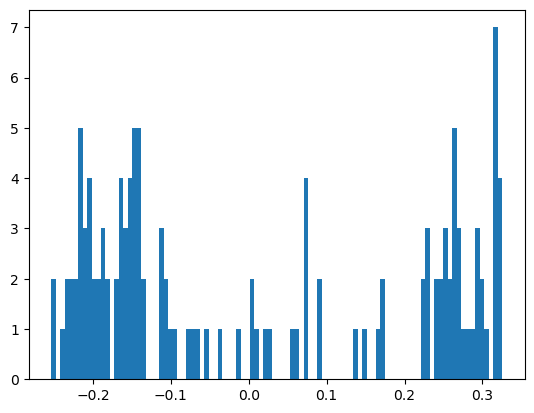

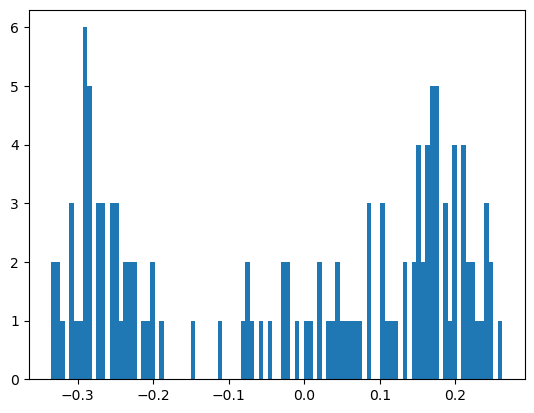

In [31]:
plt.hist(fcn_with_softmax.fcn_model.fc.weight[0].detach().cpu().numpy().flatten(),bins=100)
plt.show()
plt.hist(fcn_with_softmax.fcn_model.fc.weight[1].detach().cpu().numpy().flatten(),bins=100)
plt.show()

In [54]:
#get_gradient_from_layers(model, hook_block, data, target_class: Union[int, Container], device='cuda')
from utils.model_utils import get_gradient_from_layers
c0_grad = get_gradient_from_layers(fcn_with_softmax, fcn_with_softmax.fcn_model.gap.gap, train_x[995:1005],0)
c0_grad

  0%|          | 0/10 [00:00<?, ?it/s]

array([[ 3.83125473e-04, -3.15020792e-04,  5.23559167e-04, ...,
        -3.67401808e-04, -1.88296806e-04, -3.28990107e-04],
       [ 2.18602130e-04, -1.79742143e-04,  2.98733066e-04, ...,
        -2.09629361e-04, -1.07434833e-04, -1.87713362e-04],
       [ 1.28408981e-04, -1.05582687e-04,  1.75477529e-04, ...,
        -1.23138772e-04, -6.31093280e-05, -1.10264795e-04],
       ...,
       [ 9.25787099e-05, -7.61216870e-05,  1.26513623e-04, ...,
        -8.87790666e-05, -4.54997717e-05, -7.94973457e-05],
       [ 3.33792705e-04, -2.74456892e-04,  4.56145091e-04, ...,
        -3.20093066e-04, -1.64049517e-04, -2.86627823e-04],
       [ 2.04977812e-04, -1.68540457e-04,  2.80112843e-04, ...,
        -1.96565030e-04, -1.00740697e-04, -1.76014466e-04]], dtype=float32)

In [63]:
probe_coef

array([-1.60517372e-01,  1.57066753e-01,  6.33858664e-01,  9.53214852e-01,
       -2.90295354e-01, -8.07773387e-02,  1.13018003e-01, -3.16194797e+00,
       -1.23358924e+00, -8.71236357e+00,  1.42474123e+00, -2.14776936e-01,
        3.61496264e-01,  2.69513669e-02,  2.15117840e-01, -6.79726420e-01,
       -2.59593505e+00, -5.97980055e-01,  1.14829915e+00,  9.98411474e-01,
       -1.27703542e+00,  6.00372511e-01, -1.47942107e-01,  5.51381236e-01,
        1.99757808e-01, -8.68877487e-01, -1.00022823e+00, -1.01717710e+00,
        9.81346590e-01,  5.89122961e-01,  1.33281098e+00,  1.46206961e+00,
        1.81505660e-01, -1.13826016e+00,  9.70730387e-01,  1.02691336e-01,
        4.87964476e-01,  5.09712135e-01, -3.44503944e-01, -1.36003607e-01,
        5.49915863e-01,  4.13127245e-01,  1.54728092e-01,  2.85705222e-01,
       -2.73434142e+00,  4.91596552e-01,  4.11490598e-01,  9.64777077e-01,
        4.23400790e-01, -5.29604663e-01, -6.82651518e-01, -1.39048651e+00,
        4.18160444e-01,  

In [68]:
c0_grad / np.linalg.norm(c0_grad, axis=1)[:, np.newaxis]

array([[ 0.09998916, -0.08221501,  0.13663994, ..., -0.09588555,
        -0.04914223, -0.08586076],
       [ 0.0999887 , -0.08221412,  0.13664062, ..., -0.09588455,
        -0.04914074, -0.08586016],
       [ 0.09998901, -0.08221472,  0.13664016, ..., -0.09588522,
        -0.04914173, -0.08586057],
       ...,
       [ 0.099989  , -0.08221471,  0.13664018, ..., -0.09588522,
        -0.04914172, -0.08586057],
       [ 0.099989  , -0.08221471,  0.13664016, ..., -0.09588522,
        -0.04914172, -0.08586056],
       [ 0.099989  , -0.08221471,  0.13664016, ..., -0.0958852 ,
        -0.04914171, -0.08586056]], dtype=float32)

In [64]:
c0_grad / np.linalg.norm(c0_grad, axis=1)

ValueError: operands could not be broadcast together with shapes (10,128) (10,) 

In [55]:
scores = c0_grad @ probe_coef / np.linalg.norm(c0_grad, axis=1) / np.linalg.norm(probe_coef)

In [56]:
scores

array([0.10849676, 0.10849615, 0.10849655, 0.10849614, 0.10851807,
       0.10849655, 0.10849655, 0.10849655, 0.10849655, 0.10849654])

In [30]:
with open('probe/simu_implet_random_scaled/probe_latent_label.pkl', 'rb') as f:
    probe_latent_label = pickle.load(f)
dataset_s_distances = probe_latent_label['dataset_s_distances']
pdata_s_distances = probe_latent_label['pdata_s_distances']
# best_threshold = probe_latent_label['best_threshold']
dataset_s_label = probe_latent_label['dataset_s_label']
pdata_s_label = probe_latent_label['pdata_s_label']
dataset_latent = probe_latent_label['dataset_latent']
pdata_latent = probe_latent_label['pdata_latent']

In [31]:
print(np.count_nonzero([i==1 for i in dataset_s_label]))
print(np.count_nonzero([i==0 for i in dataset_s_label]))

2000
0


In [236]:
print(np.count_nonzero([i==1 for i in pdata_s_label]))
print(np.count_nonzero([i==0 for i in pdata_s_label]))

1680
1680


In [37]:
with open('probe/simu_implet_random_scaled/results.pkl', 'rb') as f:
    results = pickle.load(f)
# pdata_s_pred = results['pdata_s_pred']
dataset_s_pred = results['dataset_s_pred']
print(np.count_nonzero([i==1 for i in dataset_s_pred]))
print(np.count_nonzero([i==0 for i in dataset_s_pred]))
# print(np.count_nonzero([i==1 for i in pdata_s_pred]))
# print(np.count_nonzero([i==0 for i in pdata_s_pred]))

501
1499


In [34]:
len(dataset_s_label)

2000

In [35]:
label = np.zeros(len(pdata_s_label)+len(dataset_s_label),dtype=np.uint8)
for i in range(len(pdata_s_label)+len(dataset_s_label)):
    if i<3360 and pdata_s_label[i]==0:
        label[i] = 0
    elif i<3360 and pdata_s_label[i]==1:
        label[i] = 1 
    elif i>=3360 and dataset_s_label[i-3360]==0:
        label[i] = 2
    elif i>=3360 and dataset_s_label[i-3360]==1:
        label[i] = 3

In [36]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=5)
latent_vis = tsne.fit_transform(np.concatenate((pdata_latent,dataset_latent)))

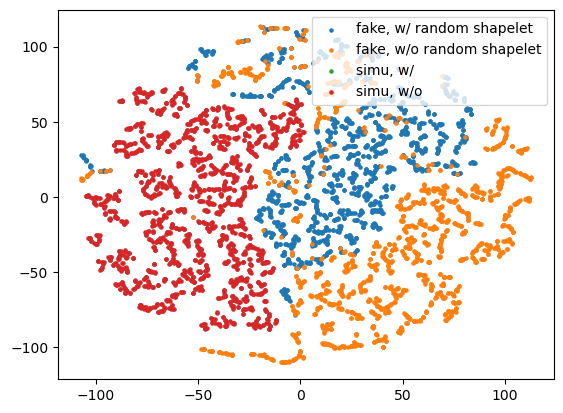

In [38]:
plt.scatter(latent_vis[label == 0, 0], latent_vis[label == 0, 1], label='fake, w/ random shapelet', s=5)
plt.scatter(latent_vis[label == 1, 0], latent_vis[label == 1, 1], label='fake, w/o random shapelet', s=5)
plt.scatter(latent_vis[label == 2, 0], latent_vis[label == 2, 1], label='simu, w/', s=5, color=plt.get_cmap('tab10')(2))
plt.scatter(latent_vis[label == 3, 0], latent_vis[label == 3, 1], label='simu, w/o', s=5, color=plt.get_cmap('tab10')(3))

plt.legend()
plt.savefig('probe/simu_implet_random_scaled/tsne.png')

In [119]:
probe_shapelet(dataset=train_x, labels=train_y, pdata=test_x, model=model, 
                         shapelet=shapelet, pos=start_pos, device='cuda:1')

(2000, 128) (2000, 128)
Training Accuracy = 1.00
----------------------
Accuracy = 1.00
Precision = 1.00
Recall = 1.00
F1 Score = 1.00


{'pdata_s_pred': array([0., 0., 0., ..., 1., 1., 1.], dtype=float32),
 'dataset_s_pred': array([0., 0., 0., ..., 1., 1., 1.], dtype=float32),
 'accuracy': 0.998}